In [1]:
import sys
import os
# Get parent of current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add it to sys.path
sys.path.insert(0, parent_dir)

import matplotlib.pyplot as plt
import numpy as np

from STL_2D_Kernel_Torch import STL_2D_Kernel_Torch as DataClass
from ST_Operator import ST_Operator as SO
from Synthesis import optimize_scattering_LBFGS

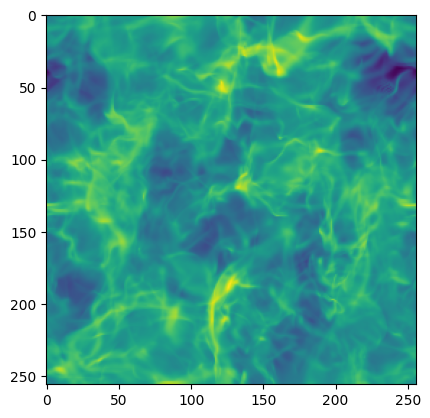

In [2]:
im=np.load('Turb_6.npy')[:,None,:,:]
data=DataClass(im)
plt.imshow(im[0,0])

# test wavelet computation

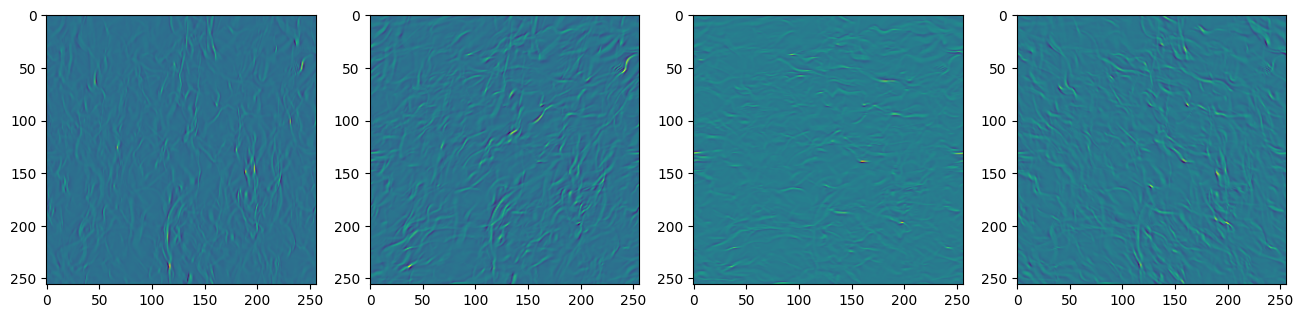

In [3]:
w_op=data.get_wavelet_op()

w_data = w_op.apply(data,0).array

plt.figure(figsize=(16,6))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(w_data[0,0,k].cpu().numpy().real)

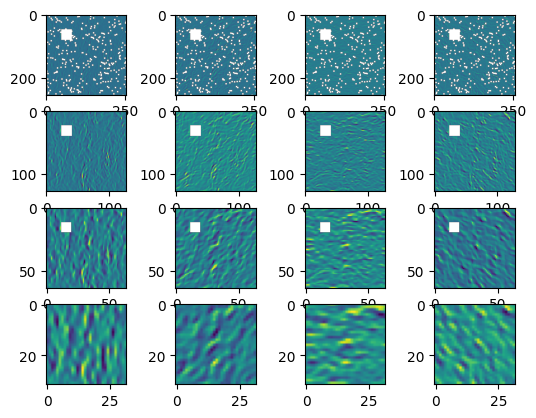

In [4]:
tmp=im[0,0].copy()
tmp[(np.random.rand(300)*tmp.shape[0]).astype('int'),
    (np.random.rand(300)*tmp.shape[0]).astype('int')]=np.nan
tmp[50:80,50:80]=np.nan

l_data=DataClass(tmp)
for j in range(4):
    w_data = w_op.apply(l_data,j).array
    for k in range(4):
        plt.subplot(4,4,1+k+4*j)
        plt.imshow(w_data[k].cpu().numpy().real)
        
    l_data=w_op.nandownsample(l_data,j+1)

In [5]:
from ST_Operator import ST_Operator as STO

l_data=DataClass(im[0,0])

st_op=STO(l_data)

st_data = st_op.apply(l_data)
st_data_nan = st_op.apply(DataClass(tmp),use_NaN=True)

RuntimeError: nansum does not support complex inputs

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


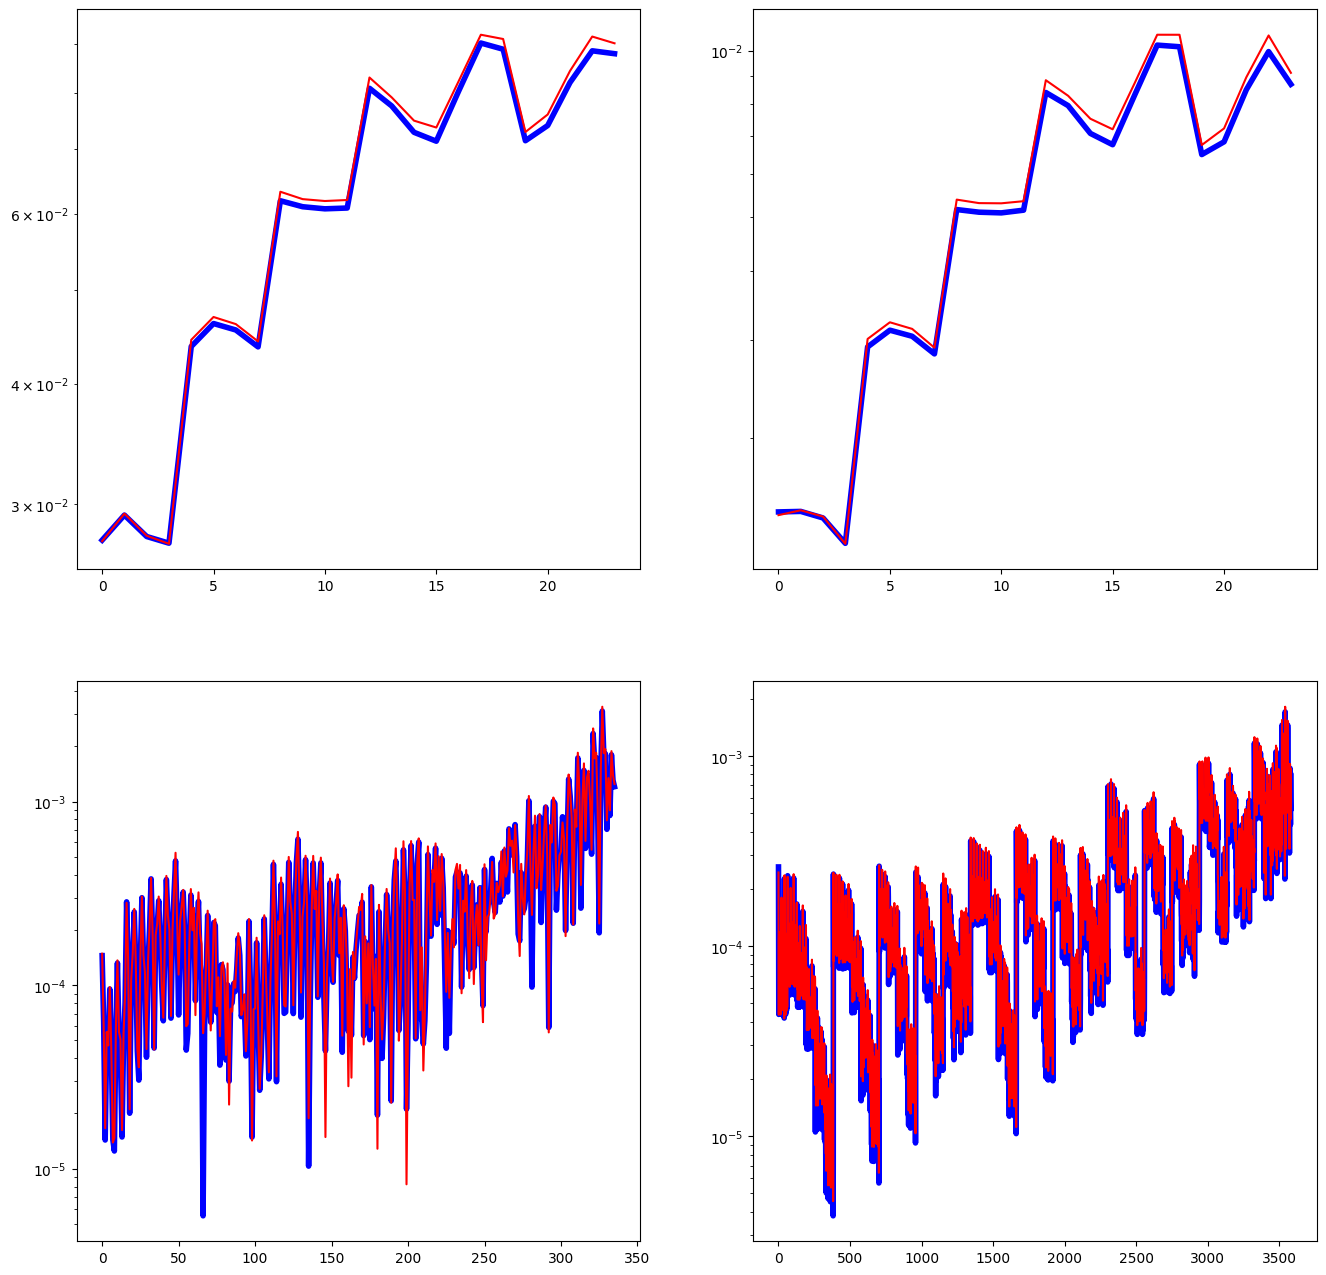

In [6]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(st_data.S1.cpu().numpy().flatten(),color='b',lw=4)
plt.plot(st_data_nan.S1.cpu().numpy().flatten(),color='r')
plt.yscale('log')
plt.subplot(2,2,2)
plt.plot(st_data.S2.cpu().numpy().flatten(),color='b',lw=4)
plt.plot(st_data_nan.S2.cpu().numpy().flatten(),color='r')
plt.yscale('log')
def r_nan(x):
    return x[np.isfinite(x)]
plt.subplot(2,2,3)
plt.plot(r_nan(st_data.S3.abs().cpu().numpy().flatten()),color='b',lw=4)
plt.plot(r_nan(st_data_nan.S3.abs().cpu().numpy().flatten()),color='r')
plt.yscale('log')
plt.subplot(2,2,4)
plt.plot(r_nan(st_data.S4.cpu().numpy().flatten()),color='b',lw=4)
plt.plot(r_nan(st_data_nan.S4.cpu().numpy().flatten()),color='r')
plt.yscale('log')

# do synthesis

In [7]:
st_data = st_op.apply(l_data)
st_data_norm = st_op.apply(l_data,norm='store_ref')

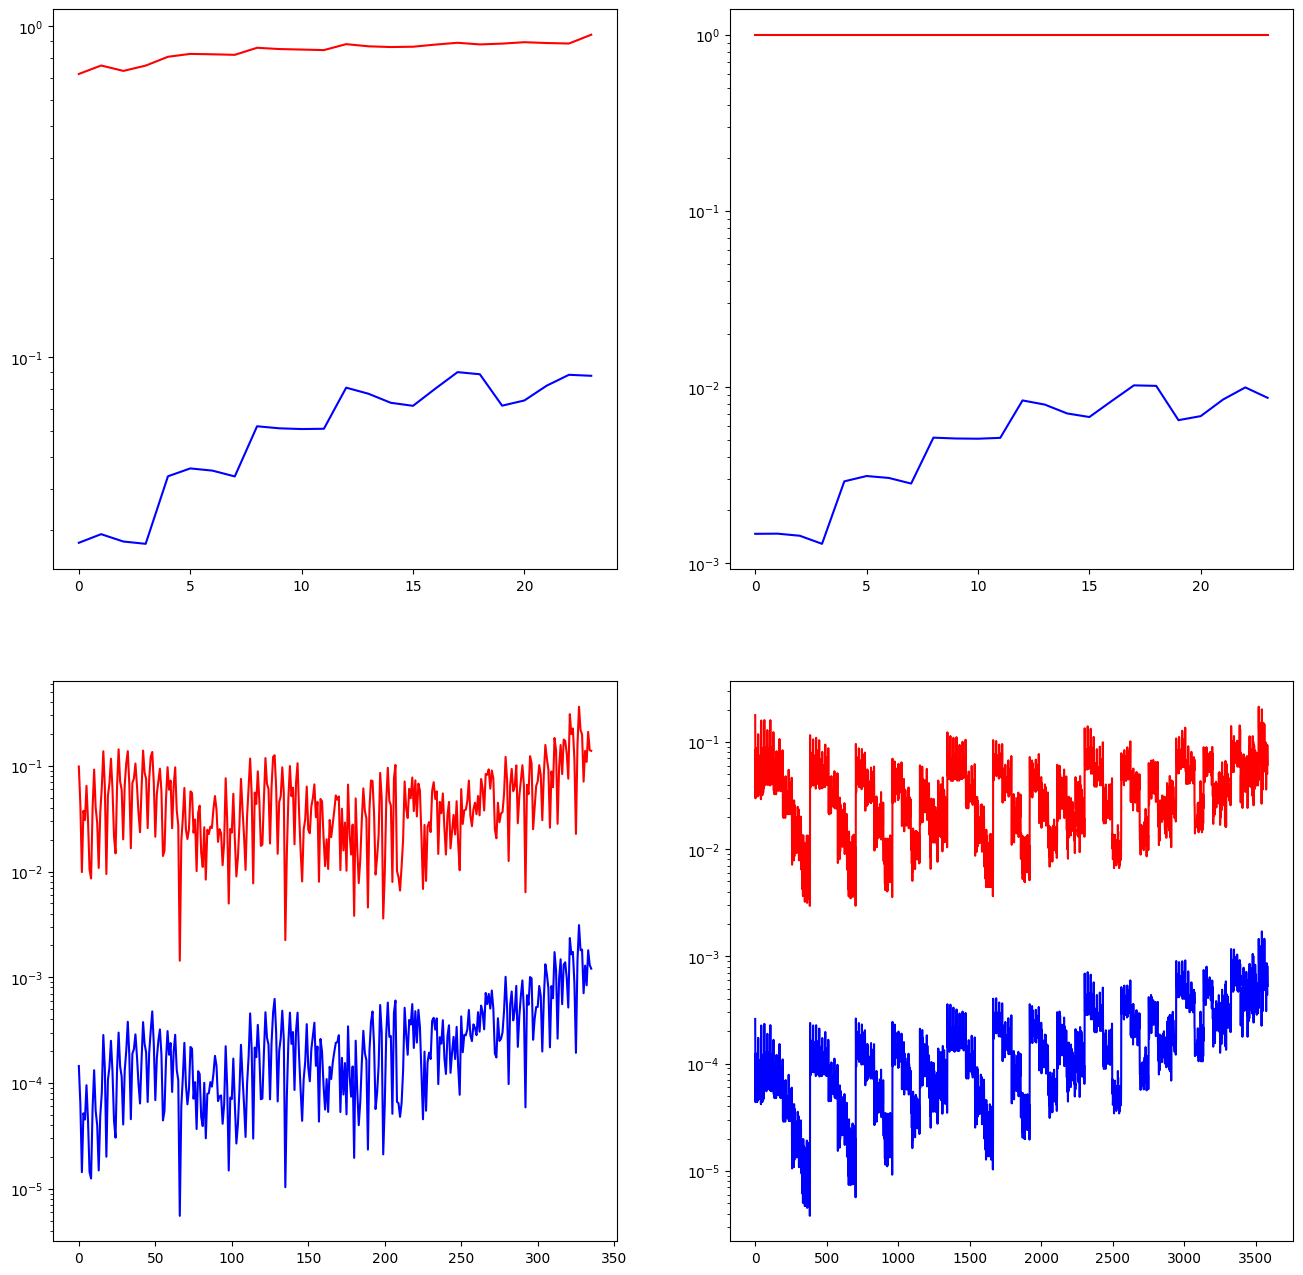

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(st_data.S1.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S1.cpu().numpy().flatten(),color='r')
plt.yscale('log')
plt.subplot(2,2,2)
plt.plot(st_data.S2.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S2.cpu().numpy().flatten(),color='r')
plt.yscale('log')
def r_nan(x):
    return x[np.isfinite(x)]
plt.subplot(2,2,3)
plt.plot(r_nan(st_data.S3.abs().cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S3.abs().cpu().numpy().flatten()),color='r')
plt.yscale('log')
plt.subplot(2,2,4)
plt.plot(r_nan(st_data.S4.cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S4.cpu().numpy().flatten()),color='r')
plt.yscale('log')

# do synthesis

In [9]:
data = DataClass(im[0,0])
w_op = data.get_wavelet_op()

#Build the smooth version
target = w_op.apply_smooth(data).array.cpu().numpy()
target[(np.random.rand(300)*tmp.shape[0]).astype('int'),
    (np.random.rand(300)*tmp.shape[0]).astype('int')]=np.nan
target[50:80,50:80]=np.nan

Text(0.5, 1.0, 'Target')

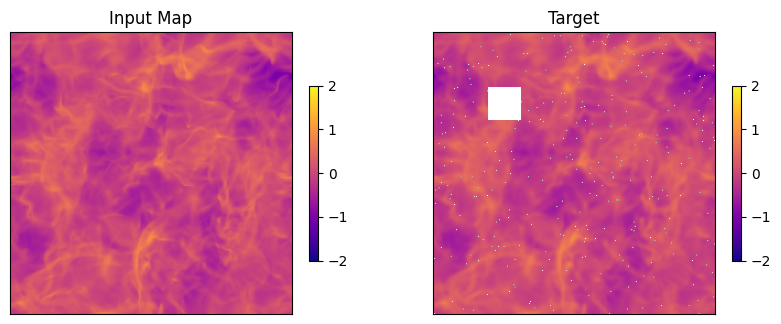

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im[0,0]-np.mean(im[0,0]),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Input Map')
plt.subplot(2,2,2)
plt.imshow(target-np.nanmean(target),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')

In [11]:
u,histo = optimize_scattering_LBFGS(
        target,
        DataClass,
        SO,
        nbatch=4,
        max_iter=300,
        lr=1.0,
        history_size=50,
        print_iter=30,
        verbose=True,
    )

NaN detected in the target, the synthesis take it into account
[LBFGS] inner iter 30, loss = 5.638458e-01
[LBFGS] inner iter 60, loss = 4.078414e-02
[LBFGS] inner iter 90, loss = 1.588937e-02
[LBFGS] inner iter 120, loss = 8.859599e-03
[LBFGS] inner iter 150, loss = 6.045578e-03
[LBFGS] inner iter 180, loss = 4.432661e-03
[LBFGS] inner iter 210, loss = 3.516130e-03
[LBFGS] inner iter 240, loss = 2.900126e-03
[LBFGS] inner iter 270, loss = 2.454272e-03
[LBFGS] inner iter 300, loss = 2.122786e-03


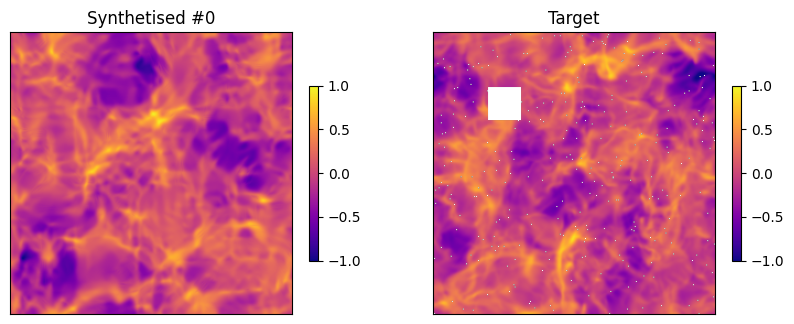

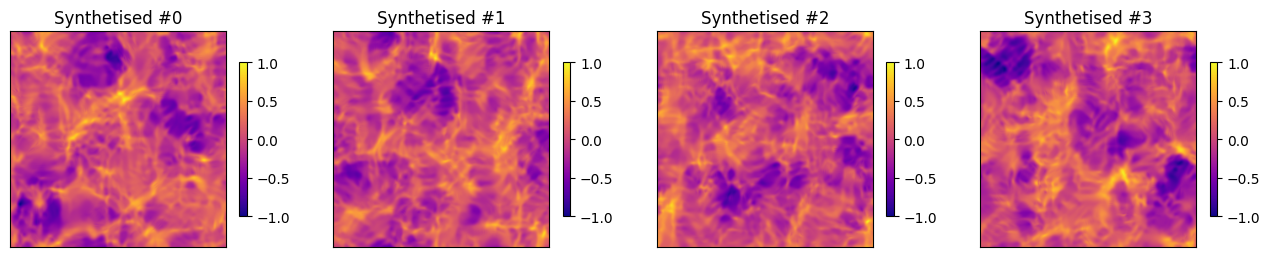

In [12]:
plt.figure(figsize=(10,10))
amp=1
plt.subplot(2,2,1)
plt.imshow(u[0].cpu().numpy(),cmap='plasma',vmin=-amp,vmax=amp)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Synthetised #0')
plt.subplot(2,2,2)
plt.imshow(target-np.nanmean(target),cmap='plasma',vmin=-amp,vmax=amp)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')

plt.figure(figsize=(16,4))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(u[k].cpu().numpy(),cmap='plasma',vmin=-amp,vmax=amp)
    plt.colorbar(shrink=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Synthetised #%d'%(k))